# Plotly ile Veri Görselleştirme

Geleceğin petrolü olarak kabul edilen verinin hacminin giderek büyümesi dolayısıyla bu alandaki çalışmalar da hızlanmaktadır. Bu kapsamda ham halde bulunan bu verinin, tüm kıymetli madenler gibi işlenmesi zorunlu hale gelmektedir. Yüzlerce hatta binlerce satırdan ve sütundan oluşan ham haldeki bu verinin doğru anlaşılabilmesi için tamda bu noktada özellikle programlama dilleri için geliştirilen görselleştirme kütüphaneleri imdada yetişmektedir. Bu kütüphaneler sayesinde ham veri tabiri caizse dile gelmekte ve size içinde barındırdığı kıymetli bilgiyi aktarmaktadır.

Bu kütüphanelerden birisi olan Plotly, modern veri bilimi dünyasında veri görselleştirmeye yeni bir soluk getiren interaktif bir görselleştirme kütüphanesidir. Plotly; Python, R ve JavaScript gibi popüler programlama dilleriyle uyumlu olup, kullanıcıya veri analizlerini ve sonuçlarını dinamik bir şekilde sunmaktadır.

Plotly’nin kullanım alanları oldukça geniştir. Finansal analizlerden, biyobilim çalışmalarına; eğitim materyallerinden, iş dünyasındaki sunumlara kadar birçok alanda kullanılabilmektedir. İnteraktif özellikleri sayesinde, kullanıcılar grafik üzerinde dolaşabilir, belirli veri noktalarına yakınlaşabilir ve hatta bu veri noktaları üzerinde daha fazla bilgi edinebilirler. Bu durum, veri seti üzerinden anlatılmak istenen bulguların, dinleyici veya okuyucuya daha etkili bir şekilde sunulmasına olanak tanır.

Plotly’yi diğer görsel kütüphanelerden ayıran en büyük özellik, interaktiflik kapasitesidir. Örneğin, Matplotlib ya da Seaborn gibi kütüphaneler mükemmel görseller üretse de, çıktılar genellikle statik olup, kullanıcı etkileşimi sınırlıdır. Plotly ise bu sınırlamaları ortadan kaldırır ve kullanıcının grafikle daha birebir etkileşimde bulunmasına imkan tanır. Ayrıca, web tabanlı projelerde kolayca entegre edilebilirliği sayesinde, Plotly modern veri bilimi uygulamaları için vazgeçilmez bir araçtır.

Özellikle dijitalleşen çağımızda, veri sunumlarının sadece statik görsellerden ibaret olmaması aktarılacak bilgiyi daha çekici hale getirmektedir. Bu durum insanların daha etkileşimli içeriklere olan ilgisinden ve beklentisinden kaynaklanmaktadır. Plotly, bu beklentiyi karşılayarak veri sunumlarını daha etkileyici ve bilgilendirici bir hale de getirmektedir.

Kısacası, Plotly ile verilerinizi tanımlamak için elde edeceğiniz görselleri bir üst seviyeye taşıyabilir ve analizlerinizi daha etkileyici bir şekilde sunabilirsiniz. Hadi gelin örnek bir çalışmayı birlikte inceleyelim ve size güzel bir notebook hazırlayalım.

## Kütüphaneleri yükleyerek başlayalım


In [26]:
!pip install plotly
!pip install dash #reaktif web uygulamaları oluşturmak için geliştirilmiştir.dash board
!pip install wordcloud #özellikle kelime bulutu nlp alanında kullanılabilir bir kelimenin önemi için
!pip install cufflinks #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
!pip install missingno #kayıp verileri görselleştirmek için


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Şimdi ise import’larımızı yapalım

In [27]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

# warnings
import warnings
warnings.filterwarnings("ignore") #kod satırlarında önemsiz uyarıları görmemek için kullanıyoruz.

# Şimdi de örnek yapacağımız data setini yükleyelim. Öncesinde datayı tanımlayalım tabiki. Data setimiz dünya genelindeki üniversitelerle ilgili çeşitli özellikleri ve değerlendirmeleri içeren bilgileri içermektedir. Her özellik, üniversitelerin farklı yönlerini değerlendiren kriterlere göre bilgi içerir.

In [28]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

Data setimiz toplamda 14 özelliği içermektedir. Bunlar:

world_rank: Üniversitelerin dünya genelindeki sıralaması.
university_name: Üniversitenin ismi.
country: Üniversitenin bulunduğu ülke.
teaching: Öğretim kalitesini belirten bir skor.
international: Uluslararası çeşitlilik ve etkileşimi belirten bir ölçüt.
research: Üniversitenin araştırma performansını belirten bir skor.
citations:Üniversitenin araştırma çıktılarının alıntı sayısı veya etkisi.
income: Üniversitenin geliri veya finansal sağlığı.
total_score: Üniversitelerin genel performansını belirten bir skor.
num_students:Üniversitede kayıtlı öğrenci sayısı.
student_staff_ratio: Öğrenci başına düşen personel sayısı.
international_students: Üniversitedeki uluslararası öğrenci yüzdesi veya sayısı.
female_male_ratio: Kadın erkek oranı.
year: Verinin alındığı yıl.


## Şimdi data setimizin ilk 100 satırını seçip görselleştirme örneklerimi bu data seti üzerinden yapmak istiyorum.

In [29]:
df = timesData.iloc[:100, :]

## Plotly ile Kodlama


Plotly kütüphanesinin syntax’ı diğer görsel kütüphanelere göre karmaşık gelebilir. Ancak aslında mantığı anlaşıldığında tıpkı bir boşluk dolurur gibi kod parçası oluşturabiliriz. Bunun için öncelikle plotly kütüphanesinin Figure objesini kavramak gerekmektedir. Figure objesi genellikle iki ana bileşenden oluşur. Bunlar Data ve Layout’tur.

Data bileşeni, grafiğin çizilmesi için gereken veriyi içerirken
Layout bileşeni grafiğin görünümü ile ilgili ayarları içermektedir.
Data
Data bileşeni, genellikle bir veya birden fazla çizgi (trace) içerir. Her bir çizgi, Scatter, Bar, Box, Heatmap vb. olabilir ve her biri kendi özel ayarlarına sahiptir.

Layout
Layout bileşeni, grafiğin başlığı, eksen başlıkları, ızgara çizgileri, arka plan rengi vb. gibi çeşitli stil ve formatlama ayarlarını içerir.

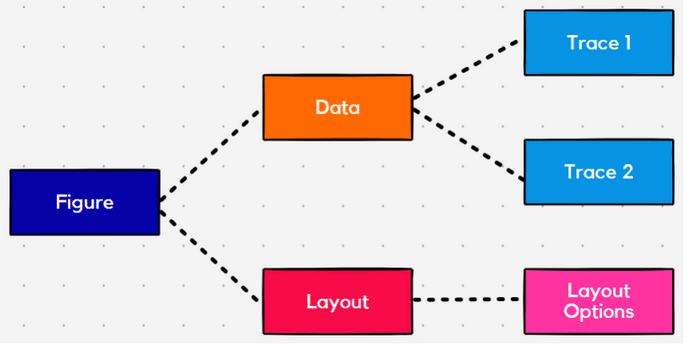

## Örnek: Aşağıda, plotly kullanarak basit bir çizgi grafiği (Scatter plot) oluşturmanın bir örneğini bulabilirsiniz.

In [30]:
import plotly.graph_objects as go

# Data
trace = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])

# Layout
layout = go.Layout(title='Basit Çizgi Grafiği', xaxis=dict(title='X Ekseni'), yaxis=dict(title='Y Ekseni'))

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Çizim
fig.show()

# Graph Types

## Line Chart
Line grafik (çizgi grafiği), genellikle zamanla değişen değerleri göstermek için kullanılan bir grafik türüdür. Line grafik zamanla değişimi göstermek, trendleri belirlemek, karşılaştırmalar yapmak, öngörülerde bulunmak için de kullanılır.

Plotly kütüphanesi ile bir line chart çizdirelim. Bu kod parçası ile, “Citation and Teaching vs World Rank of Top 100 Universities” başlığı altında, dünya sıralaması (x ekseninde) ile atıf sayısı ve öğretim skoru (y ekseninde) arasındaki ilişkiyi gösteren iki çizgi grafiği çizdirilecektir. Her çizgi, farklı bir renkte olacak, ve fareyle her bir nokta üzerine gelindiğinde, o noktaya karşılık gelen üniversitenin adı görüntülenecektir.



In [31]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.

## Scatter Plot
Scatter plot (saçılım grafiği), iki değişken arasındaki ilişkiyi, veri dağılımını ve veri gruplarını görsel olarak ayırt etmek için kullanılan bir grafik türüdür.

Şimdi plotly ile bir scatter plot çizdirelim. Bu kod parçası ile 2014, 2015 ve 2016 yıllarında ilk 100 üniversitenin citation (atıf) sayılarına karşı dünya sıralamalarını bir scatter plot ile görselleştirilmesi hedeflenmiştir.

In [32]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]


# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts
Bar chart, Kategorik verilerin değerlerinin gösterimi, bunlar arasında karşılaştırmalar yapmak için, veri dağılımının ve frekans dağılımının görselleştirilmesi için tercih edilmektedir. Özetlemek gerekirse bar charts, kategorik veri değerlerini veya frekanslarını görselleştirmek ve farklı kategoriler arasında karşılaştırma yapmak için bar chart kullanılır.

Şimdi plotly ile bir bar chart çizdirelim. Bu kod parçası ile 2014 yılında seçilen üç üniversitenin citations (atıf sayısı) ve teaching (öğretim) değerlerini gösteren gruplu bir bar grafiği gösterilmiştir.

In [33]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Pie Chart
Pie chart (dilim grafiği), bir bütünün belirli parçalarının oransal dağılımını göstermek, kategorik verinin görselleştirilmesi, bir bütün içindeki kısımların gösterilmesi için kullanılmaktadır. Ayrıca Pie chartlar, bir toplamın (örneğin bir bütçenin, nüfusun veya satışların) belirli bölümlerinin ne kadarını oluşturduğu hakkında bilgi almak için uygundur.

Bunun haricinde Pie chart kullanırken dikkat edilmesi gereken birkaç önemli nokta vardır. Bunlar;

Az Sayıda Kategori: Pie chartlar genellikle az sayıda kategori için en iyisidir. Çok fazla kategori varsa, grafik okunması zorlaşabilir.

Yüzdeliklerin Toplamı: Dilimlerin yüzdelikleri toplamı %100 olmalıdır.

Etiketleme: Pie chartlarda dilimlerin neyi temsil ettiğini belirten etiketlerin veya açıklamaların net ve okunabilir olması önemlidir.

Şimdi plotly ile bir pie chart çizdirelim. Bu kod parçası ile belirli üniversitelerin öğrenci sayıları bir pasta grafiği ile gösterilmektedir. Her bir dilim bir üniversiteyi temsil eder. Dilimlerin üzerine gelindiğinde ilgili üniversitenin ismi ve o dilimin yüzdesi görüntülenir. Ayrıca, son iki üniversite dilimi merkezden ayrılarak vurgulanmıştır ve grafik donut şeklinde bir boşluğa sahiptir.

In [34]:
# Önce 2016 yılına ait verileri ve ilk 7 kaydı alıyoruz.
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

# num_students sütununu alıp, virgülleri kaldırıyoruz ve stringi float'a çeviriyoruz.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# List comprehension ile num_students sütunundaki değerleri float’a çeviriyoruz.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# labels değişkeni ile pasta grafiği dilimlerine isimlerini yerleştiriyoruz.
labels = df2016.university_name

# Figure objesini oluşturuyoruz. 
fig = {
    "data" : [
        {
            "values" : pie_list,  # Yüzdelik dilimleri belirleyecek olan değerler.
            "labels" : labels,  # Her bir dilimin etiketi.
            "domain" : {"x": [0, .5]},  # Grafikteki konumu.
            "name" : "Number Of Students Rates",  # Grafik ismi.
            "hoverinfo" : "label + percent",  # Fareyle üzerine gelindiğinde gösterilecek bilgi.
            "hole" : .2,  # Ortadaki boşluğun büyüklüğü, bu bir donut grafiği yapar.
            "type" : "pie",  # Grafik türü.
            "pull" : [0,0,0,0,0, 0.2, 0.2]  # Belirli dilimleri vurgulamak için çekiyoruz, burada son iki dilim çekilmiş.
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",  # Ana başlık.
        "annotations" : [
            {"font" : {"size" : 20},  # Font büyüklüğü.
             "text" : "Number of Students",  # Yorum yazısı.
             "x" : 0.3,  # X konumu.
             "y" : 1  # Y konumu.
            },
        ]
    }
}

# Oluşturulan Figure objesini çizdiriyoruz.
iplot(fig)

## Buble Chart
Bubble chart (baloncuk grafiği), genellikle üç boyutlu veriyi bir arada göstermek için kullanılan bir grafik türüdür.

Bubble chart kullanımının ana nedenleri:

Üç Boyutlu Veriyi Göstermek: X ve Y eksenlerinde iki değişkeni görselleştiren bir scatter plot’un genişletilmiş bir versiyonudur. Ancak, her veri noktası bir baloncuk (bubble) ile temsil edilir ve bu baloncuğun büyüklüğü üçüncü bir değişkeni gösterir.

Değerler Arasındaki İlişkiyi Göstermek: X ve Y eksenleri arasındaki ilişkiyi, aynı zamanda üçüncü bir değişkenin büyüklüğünü de göz önünde bulundurarak gösterir.

Ekstra Bilgi Sağlamak: Baloncukların renkleri, bir dördüncü değişkeni göstermek için de kullanılabilir, böylece daha fazla bilgi bir arada sunulabilir.

Bubble chart kullanırken dikkat edilmesi gereken bazı noktalar:

Okunabilirlik: Çok fazla baloncuk olduğunda veya baloncuklar birbirine çok yakın olduğunda, grafik karmaşık ve okunması zor hale gelebilir.

Boyut Yanıltıcı Olabilir: İki baloncuğun alanlarını karşılaştırırken, büyüklükler arasındaki farklar insan gözü tarafından yanıltıcı olabilir.

Etkili Etiketleme: Özellikle birçok baloncuk olduğunda, hangi baloncuğun hangi veriye ait olduğunu belirten etiketlerin net ve okunabilir olması gerekir.

Özetlemek gerekirse, üç veya daha fazla değişkenin ilişkisini bir arada görselleştirmek için bubble chart kullanılır.

Şimdi plotly ile bir bubble chart çizdirelim. Bu kod parçası ile üniversitelerin dünya sıralaması X ekseni üzerinde, teaching skorları ise Y ekseni üzerinde gösterilmektedir. Her bir nokta, bir üniversiteyi temsil etmekte, noktaların renkleri international skorlarına, boyutları ise öğrenci sayısına göre değişmektedir. Bu grafik, çeşitli üniversitelerin teaching ve international skorlarının karşılaştırılmasını göstermektedir.



In [35]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]  # 2016 yılında dünyanın en iyi 20 üniversitesini seç

num_students_size  = [float(each.replace(",", ".")) for each in df2016.num_students]  # num_students kolonunu float tipine çevir

international_color = [float(each) for each in df2016.international]  # international kolonunu float tipine çevir

data = [  # Scatter plot oluşturulacak data'yı tanımla
    {
        "y" : df2016.teaching,  # y ekseni olarak teaching kolonunu kullan
        "x" : df2016.world_rank,  # x ekseni olarak world_rank kolonunu kullan
        "mode" : "markers",  # scatter plot için markers modunu kullan
        "marker" : {  # marker özelliklerini ayarla
            "color" : international_color,  # marker rengini international_color listesiyle belirle
            "size" : num_students_size,  # marker boyutunu num_students_size listesiyle belirle
            "showscale" : True  # renk ölçeğini göster
        },
        "text" : df2016.university_name  # her marker için üniversite ismini göster
    }
]
iplot(data)  # grafiği çiz

## Histogram
Histogram, bir veri setindeki değerlerin dağılımını göstermek için kullanılan bir grafik türüdür.

Histogram kullanımının ana nedenleri:

Veri Dağılımını Göstermek: Histogram, veri setindeki değerlerin frekans dağılımını gösterir. Yani, belirli aralıklardaki değerlerin ne kadar sık olduğunu gösterir.

Merkezi Eğilimi ve Dağılımı Değerlendirmek: Histogram aracılığıyla bir veri setinin ortalaması, modu, medyanı gibi merkezi eğilim ölçütlerini ve varyans, standart sapma gibi dağılım ölçütlerini görsel olarak değerlendirebilirsiniz.

Normal Dağılımı Gözlemlemek: Veri setinin normal bir dağılıma sahip olup olmadığını anlamak için histogram kullanılabilir.

Aykırı Değerleri Tespit Etmek: Histogram üzerinde beklenenden farklı şekillerde veya beklenmeyen yerlerde oluşan çıkıntılar, aykırı değerlerin ya da özel durumların varlığına işaret edebilir.

Histogram kullanırken dikkat edilmesi gereken bazı noktalar:

Bin Seçimi: Histogramda “bin” adı verilen sütunların genişliği önemlidir. Çok fazla bin kullanılırsa, veri setindeki doğal varyasyon belirginleşir; çok az bin kullanılırsa, veri setinin yapısı kaybolabilir.

Düzgün Dağılım: Tüm binglerin aynı genişlikte olması, veri dağılımını doğru bir şekilde yorumlamayı kolaylaştırır.

Özetle, bir veri setinin frekans dağılımını görselleştirmek, merkezi eğilim ve dağılımı değerlendirmek için histogram kullanılır.

Şimdi plotly ile bir histogram çizdirelim. Bu kod parçası ile 2011 ve 2012 yılları arasında üniversitelerdeki öğrenci-personel oranının dağılımını gösteren iki histogram çizdirlmiştir. Histogramlar üst üste geldiği için, opacity parametresi ile şeffaflıkları ayarlanmıştır. Bu sayede, iki yıl arasındaki farklılıklar ve benzerlikler daha net bir şekilde gözlemlenebilir.

In [36]:
# 1. 2011 yılına ait öğrenci-personel oranını x2011 değişkenine atar.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. 2012 yılına ait öğrenci-personel oranını x2012 değişkenine atar.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. 2011 yılı için bir histogram oluşturur.
trace1 = go.Histogram(
    x=x2011,  # X eksenine x2011 değişkenini atar.
    opacity=0.75,  # Histogramın şeffaflığını belirler.
    name = "2011",  # Histogramın adını belirler.
    marker=dict(color='rgba(171, 50, 96, 0.6)')  # Histogramın rengini belirler.
)

# 4. 2012 yılı için bir başka histogram oluşturur.
trace2 = go.Histogram(
    x=x2012,  # X eksenine x2012 değişkenini atar.
    opacity=0.75,  # Histogramın şeffaflığını belirler.
    name = "2012",  # Histogramın adını belirler.
    marker=dict(color='rgba(12, 50, 196, 0.6)')  # Histogramın rengini belirler.
)

# 5. İki histogramı bir veri listesi içine alır.
data = [trace1, trace2]

# 6. Grafiğin düzenini ve başlıklarını ayarlar.
layout = go.Layout(
    barmode='overlay',  # İki histogramın üst üste gelmesini sağlar.
    title=' students-staff ratio in 2011 and 2012',  # Grafiğin başlığını belirler.
    xaxis=dict(title='students-staff ratio'),  # X ekseninin başlığını belirler.
    yaxis=dict(title='Count')  # Y ekseninin başlığını belirler.
)

# 7. Veri ve düzeni kullanarak bir Figure nesnesi oluşturur.
fig = go.Figure(data=data, layout=layout)

# 8. Oluşturulan Figure nesnesini çizer.
iplot(fig)

## Word Cloud
Word cloud (kelime bulutu), metin verisi içerisindeki kelimelerin sıklığına veya önemine göre görselleştirilmesi amacıyla kullanılır.

Word cloud chart kullanımının ana nedenleri:

Kelime Sıklığını Göstermek: Kelime bulutu, metinde sıkça geçen kelimeleri daha büyük boyutlarla, daha az geçen kelimeleri ise daha küçük boyutlarla gösterir. Bu, hangi kelimelerin veya kavramların metinde öne çıktığını hızla gözlemlemeyi sağlar.

Metin Verisinin Görsel Özeti: Büyük bir metin yığınından anahtar kavramları ve temaları hızla özetlemek ve görsel bir şekilde sunmak için kullanılır.

Duvar Yazıları, Anketler ve Sosyal Medya İçeriği Analizi: Özellikle duvar yazıları, anket yanıtları veya sosyal medya gönderileri gibi kısa metinlerde hangi kavramların veya kelimelerin popüler olduğunu belirlemek için kullanılır.

Word cloud chart kullanırken dikkate alınması gereken hususlar:

Önemsiz Kelimelerin Filtrelenmesi: “ve”, “ama”, “ile” gibi genellikle içerik için önemsiz olan yaygın kelimeler, kelime bulutunda baskın hale gelebilir. Bu tür kelimelerin (stop words) filtrelenmesi genellikle faydalıdır.

Dikkatli Tasarım: Kelimeler arasındaki yerleşim, renk seçimi ve font seçimi gibi estetik unsurlar, kelime bulutunun etkili ve anlamlı olması için önemlidir.

Özetle, metin verisinin anahtar kavramlarını ve sıklıkla geçen kelimeleri hızla görselleştirmek için word cloud chart kullanılır.

Şimdi plotly ile bir word cloud örneği yapalım. Bu kod parçası ile 2011 yılında belirtilen ülkelerin isimlerini kullanarak bir kelime bulutu oluşturulup gösterilmektedir. Kelime bulutu, ülkelerin isimlerini görsel olarak çekici bir şekilde sunar ve kaydedilen grafiği “graph.png” olarak bilgisayarınıza kaydeder.

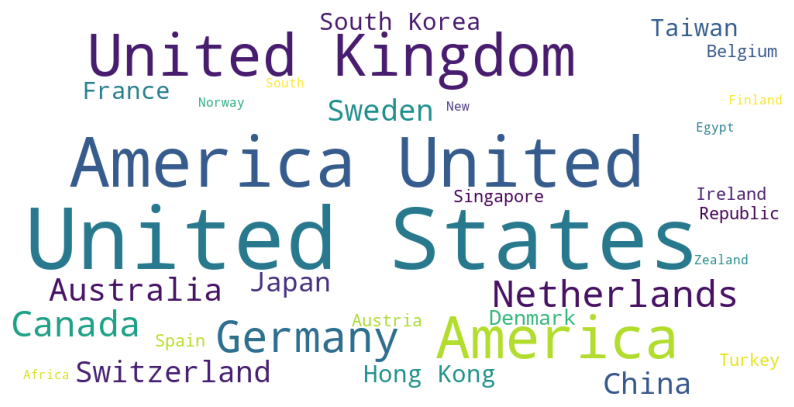

In [37]:
# 1. 2011 yılına ait ülkeleri x2011 değişkenine atar.
x2011 = timesData.country[timesData.year == 2011]

# 2. 10x10 boyutlarında bir subplot oluşturur.
plt.subplots(figsize = (10, 10))

# 3. x2011 değişkenindeki ülkeleri birleştirerek bir kelime bulutu oluşturur.
wordcloud = WordCloud(
    background_color= "white",  # Kelime bulutunun arka plan rengini beyaz olarak ayarlar.
    width = 1000,  # Kelime bulutunun genişliğini belirler.
    height= 500  # Kelime bulutunun yüksekliğini belirler.
).generate(" ".join(x2011))

# 4. Oluşturulan kelime bulutunu gösterir.
plt.imshow(wordcloud)

# 5. Grafiğin eksenlerini kapatır, böylece sadece kelime bulutu görünür.
plt.axis("off")

# 6. Grafiği bilgisayarınıza "graph.png" adıyla kaydeder.
plt.savefig("graph.png")

# 7. Grafiği ekranda gösterir.
plt.show()

## Box Plots
Box plot, bir veri setinin özet istatistiklerini (medyan, çeyreklikler, aykırı değerler vb.) göstermek için kullanılan bir grafik türüdür.

Box plot kullanımının ana nedenleri:

Veri Dağılımını Göstermek: Box plot, veri setinin merkezi eğilimini, dağılımını ve aykırı değerlerini (outliers) göstererek veri dağılımının bir özetini sunar.

Karşılaştırmalar Yapmak: Farklı kategoriler veya gruplar arasındaki veri dağılımlarını yan yana koyarak karşılaştırmayı kolaylaştırır.

Aykırı Değerleri Tespit Etmek: Box plot, veri setindeki potansiyel aykırı değerleri belirgin bir şekilde gösterir.

Dağılımın Şeklini Değerlendirmek: Verinin simetrik olup olmadığı, dağılımın ne kadar sıkışık veya yayıldığı gibi bilgileri görsel olarak sağlar.

Box plot kullanırken dikkate alınması gereken hususlar:

Veri Yapısı: Box plot, sürekli (kantitatif) veri için uygundur. Kategorik (nitel) veri ile birlikte kullanıldığında, her kategori için ayrı bir box plot oluşturulabilir.

Veri Dağılımının Anlaşılması: Box plot, medyan, birinci ve üçüncü çeyreklikler gibi özet istatistikleri gösterir, ancak veri dağılımının tam detaylarını (örneğin, mod veya bimodal bir dağılım olup olmadığı) göstermez.

Özetle, bir veri setinin özet istatistiklerini görselleştirmek, aykırı değerleri tespit etmek ve farklı gruplar veya kategoriler arasında karşılaştırmalar yapmak için box chart kullanılır.

Şimdi plotly ile bir box plot çizdirelim. Bu kod parçası ile 2015 yılında üniversitelerin toplam puanları (total_score) ve araştırma puanları (research) için iki adet Box Plot grafiği çizeceğiz. Bu grafikle elde ettiğimiz Box Plot'lar ile verilerin özet istatistikleri (medyan, çeyrekler, minimum, maksimum ve aykırı değerler) hakkında görsel bir şekilde bilgi edineceğiz.

In [38]:
# 1. 2015 yılına ait verileri x2015 değişkenine atar.
x2015 = timesData[timesData.year == 2015]

# 2. x2015.total_score verilerini kullanarak bir Box Plot oluşturur.
trace0 = go.Box(
    y=x2015.total_score,  # Box Plot'un y ekseninde gösterilecek veriyi belirtir.
    name = 'total score of universities in 2015',  # Grafiğin adını belirtir.
    marker = dict(color = 'rgb(12, 12, 140)')  # Grafiğin rengini belirtir.
)

# 3. x2015.research verilerini kullanarak bir Box Plot oluşturur.
trace1 = go.Box(
    y=x2015.research,  # Box Plot'un y ekseninde gösterilecek veriyi belirtir.
    name = 'research of universities in 2015',  # Grafiğin adını belirtir.
    marker = dict(color = 'rgb(12, 128, 128)')  # Grafiğin rengini belirtir.
)

# 4. Oluşturulan Box Plot'ları bir liste içerisinde toplar.
data = [trace0, trace1]

# 5. Oluşturulan Box Plot'ları çizer.
iplot(data)

Scatter Matrix Plots
Scatter Matrix Plots (“pair plots” olarak da adlandırılır), birden çok sürekli değişkenin birbiriyle olan ilişkisini incelemek için kullanılan bir görselleştirme yöntemidir.

Scatter Matrix Plots kullanımının ana nedenleri:

Değişkenler Arası İlişkileri Gözlemlemek: Birden fazla değişken arasındaki potansiyel ilişkileri veya korelasyonları hızlı bir şekilde görselleştirmek için kullanılır.

Veri Dağılımını Göstermek: Her değişkenin kendisi için dağılımını (genellikle histogram veya kernel density estimation şeklinde) ana köşegen üzerinde gösterir.

Multivaryant Veri Analizi: Scatter matrix, multivaryant veri setlerindeki değişkenlerin birbiriyle olan etkileşimlerini anlamaya yardımcı olabilir.

Aykırı Değerleri ve Veri Yoğunluklarını Tespit Etmek: Değişkenlerin birbiriyle olan ilişkisini gösteren scatter plotlarda, aykırı değerler veya özel veri yoğunlukları gözlemlenebilir.

Scatter Matrix Plots kullanırken dikkate alınması gereken hususlar:

Veri Yoğunluğu: Çok fazla gözlem veya değişken olduğunda, scatter matrix plots yoğun ve okunması zor olabilir. Bu durumda, örnekleme veya daha spesifik değişken seçimi yapmak faydalı olabilir.

Kategorik Değişkenler: Bu tür plotlar genellikle sürekli değişkenler için daha uygundur. Kategorik değişkenlerin dahil edilmesi durumunda, farklı renklendirme veya simgeler kullanarak görselleştirme yapılabilir.

Özetle, birden fazla sürekli değişken arasındaki ilişkileri hızla görselleştirmek, değişkenlerin dağılımlarını incelemek ve multivaryant veri analizi yapmak için Scatter Matrix Plots kullanılabilir.

Şimdi plotly ile bir Scatter Matrix Plots çizdirelim. Bu kod parçası ile 2015 yılındaki üniversitelerin “research”, “international”, ve “total_score” sütunlarına dayalı olarak bir scatter plot matrisi oluşturur. Scatter plot matrisi, birden çok değişken arasındaki ilişkileri gösteren bir seri scatter plot içerir. Köşegen üzerindeki box plotlar, ilgili değişkenin özet istatistiklerini göstermektedir. Seçilen ‘Portland’ renk düzeni ise grafiğin daha anlaşılır ve okunabilir şekilde olmasını sağlamaktadır.



In [39]:
# 1. Plotly'nin figure_factory modülünü içe aktarır.
import plotly.figure_factory as ff

# 2. 2015 yılına ait verileri dataframe değişkenine atar.
dataframe = timesData[timesData.year == 2015]

# 3. dataframe değişkeninden belirli sütunları seçer ve data2015 değişkenine atar.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. data2015 DataFrame'ine yeni bir "index" sütunu ekler ve bu sütuna ardışık sayılar atar.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. data2015 verilerini kullanarak bir scatter plot matrisi oluşturur.
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Oluşturulan scatter plot matrisini çizer.
iplot(fig)

## Animation with Plotly
Malum Plotly’nin etkileşimli grafikler oluşturmak için kullanılan popüler bir kütüphane olduğunu belirtmiştim. Dolayısıyla Plotly, animasyonlar ve veri görselleştirmelerine zaman boyunca dinamik bir boyut eklemek içinde kullanılabilmektedir.

Özellikle Plotly’nin animasyon kullanım alanları:

Zamanla Değişen Veriyi Göstermek: Animasyonlar, zaman serisi verileri gibi zamanla değişen veriyi görselleştirmek için idealdir. Örneğin, bir ülkenin yıllar boyunca GDP’sinin nasıl değiştiğini gösteren bir animasyon oluşturabilirsiniz.

Trendleri ve Desenleri Anlamak: Animasyon, verideki trendleri ve desenleri belirlemeyi ve anlamayı kolaylaştırabilir.

Etkileyici Sunumlar: Animasyonlar, sunumlarınıza veya web sitenize dinamik ve etkileyici görselleştirmeler ekleyerek izleyicinizin dikkatini çekebilir.

Senaryo Karşılaştırmaları: Farklı senaryoları veya durumları karşılaştırmak için animasyonları kullanabilirsiniz. Örneğin, farklı senaryolar altında bir simulasyonun sonuçlarını göstermek.

Plotly ile animasyon kullanırken dikkate alınması gereken hususlar ise;

Bilgi Yüklenmesi: Çok fazla animasyon, izleyici üzerinde bilgi yüklenmesine neden olabilir. Özellikle karmaşık veri setleriyle çalışırken animasyonları basit ve anlaşılır tutmak önemlidir.

Performans Sorunları: Büyük veri setleriyle yapılan animasyonlar, bazen yavaş yüklenebilir veya tarayıcıda takılabilir. Veri optimizasyonu yaparak bu tür sorunların önüne geçmek mümkündür.

Uygun Aralık: Animasyonun çok hızlı veya yavaş olmamasına dikkat edilmelidir. Animasyonun hızı, izleyicinin veriyi rahatça takip edebilmesine uygun olmalıdır.

Özetle, zamanla değişen veriyi görselleştirmek, trendleri ve desenleri anlamak, etkileyici sunumlar yapmak ve farklı senaryoları karşılaştırmak için Plotly ile animasyonlar kullanılabilmektedir.

Plotly kullanarak çizeceğimiz bu son grafikle yeni bir data seti ile kişi başına düşen gelir (GDP per Capita) ile yaşam beklentisi (Life Expectancy) arasındaki ilişkinin, yıllar boyunca nasıl değiştiğini gösteren bir scatter grafiği oluşturacağız.

Grafikteki Her Nokta: Bir ülkeyi temsil eder.

Noktaların Rengi: Farklı kıtaları temsil eder. Renkler kıta bazında ayrılmıştır, böylece aynı kıtadan gelen ülkeler benzer renkte gösterilir.

Noktaların Boyutu: Ülkenin nüfusunu temsil eder. Daha büyük noktalar, daha yüksek nüfusa sahip ülkeleri gösterirken, daha küçük noktalar daha düşük nüfusa sahip ülkeleri gösterir.

Animasyon: Grafiğin alt kısmında bir zaman çubuğu bulunmaktadır. Bu zaman çubuğunu kullanarak yıllar boyunca kişi başına düşen gelirin ve yaşam beklentisinin nasıl değiştiğini gözlemleyebilirsiniz.

Hover Özelliği: Herhangi bir noktanın üzerine geldiğinizde, o noktanın hangi ülkeyi temsil ettiğini görebilirsiniz.

Özetle, bu grafik, yıllar içindeki ekonomik büyümenin (kişi başına düşen gelir) yaşam beklentisi üzerindeki etkisini gösteren dinamik ve interaktif bir görselleştirmedir. Ayrıca kıtalararası ve ülkelerarası farklılıkları da açıkça görebilirsiniz.

In [40]:
import plotly.express as px  # Plotly Express kütüphanesini içe aktarır.
df = px.data.gapminder()  # Gapminder veri setini df değişkenine yükler.

# px.scatter fonksiyonunu kullanarak bir scatter grafiği oluşturur. 
# Bu grafikte x ekseninde kişi başına düşen gelir (GDP per Capita), 
# y ekseninde ise yaşam beklentisi (Life Expectancy) bulunmaktadır.
# animation_frame ile yıllara göre animasyon eklenirken, 
# animation_group ile ülkeler animasyon grupları olarak belirlenmiştir.
# size parametresi ile noktaların boyutu ülkenin nüfusuna göre ayarlanmıştır.
# color parametresi ile noktalar kıtalarına göre renklendirilmiştir.
# hover_name ile fareyle üzerine gelindiğinde ülkenin adı gösterilmiştir.
# log_x=True ile x ekseni için logaritmik ölçek kullanılmıştır.
# size_max=55 ile noktanın maksimum boyutu belirlenmiştir.
# range_x ve range_y ile x ve y eksenleri için değer aralıkları belirlenmiştir.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])

“Sonuç olarak Plotly, yenilikçi yaklaşımın öncülerinden biri olarak, sadece grafikler oluşturmayı değil, aynı zamanda bu grafiklerle etkileşim kurmayı mümkün kılmaktadır. Bu durum, hem bilgi sunumunun kalitesini artırırken, analizlerin daha derinlemesine yapılmasına olanak tanımaktadır.

Faydalı olması dileğiyle…